# Strava Data Analysis

Analysis of my Strava data

Some guidance from https://towardsdatascience.com/analysing-strava-data-with-python-b8a5badb019f used

In [2]:
#pandas import
import pandas as pd
#matplotlib import
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm #for colors
#and numpy
import numpy as np
#sns for data analysis and visualization
import seaborn as sns

#disable the warnings for chained data in pandas
pd.options.mode.chained_assignment = None  # default='warn'


In [3]:
#import data into pandas dataframe

df = pd.read_csv("../../strava_data/activities.csv")

In [4]:
#check all of the keys in the dataframe
df.keys()

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate',
       'Relative Effort', 'Commute', 'Activity Private Note', 'Activity Gear',
       'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1',
       'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed',
       'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High',
       'Max Grade', 'Average Grade', 'Average Positive Grade',
       'Average Negative Grade', 'Max Cadence', 'Average Cadence',
       'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts',
       'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion', 'Type',
       'Start Time', 'Weighted Average Power', 'Power Count',
       'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Commute.1',
    

In [5]:
#drop a bunch of keys that we don't need

df.drop(['Activity ID','Relative Effort', 'Commute', 'Activity Private Note',
       'Filename', 'Athlete Weight', 'Bike Weight', 
       'Max Grade', 'Average Grade', 'Average Positive Grade',
       'Average Negative Grade', 'Max Cadence', 'Average Cadence',
       'Max Watts', 'Average Watts',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion',
       'Weighted Average Power', 'Power Count',
       'Prefer Perceived Exertion', 'Perceived Relative Effort',
       'Total Weight Lifted', 'From Upload', 'Grade Adjusted Distance',
       'Weather Observation Time', 'Weather Condition', 'Weather Temperature',
       'Apparent Temperature', 'Dewpoint', 'Humidity', 'Weather Pressure',
       'Wind Speed', 'Wind Gust', 'Wind Bearing', 'Precipitation Intensity',
       'Sunrise Time', 'Sunset Time', 'Moon Phase', 'Bike',
       'Precipitation Probability', 'Precipitation Type', 'Cloud Cover',
       'Weather Visibility', 'UV Index', 'Weather Ozone', 'Jump Count',
       'Total Grit', 'Average Flow', 'Flagged',
       'Dirt Distance', 'Newly Explored Distance',
       'Newly Explored Dirt Distance', 'Activity Count',
       'Carbon Saved', 'Pool Length', 'Training Load',
       'Average Grade Adjusted Pace', 'Timer Time', 'Total Cycles', 'Media','Distance.1',
       'Elapsed Time.1','Commute.1','Start Time','Type','Intensity','Max Heart Rate.1','Max Temperature'],axis=1,inplace=True)

df.tail(5)

,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Activity Gear,Moving Time,Max Speed,...,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Average Heart Rate,Calories,Average Temperature,Gear,Average Elapsed Speed,Total Steps
553,"Oct 1, 2024, 2:33:12 PM",Morning Run,Run,NaN,2104,6.38,173.0,blue-yellow 2,2081.0,4.098307,...,63.0,61.0,24.799999,78.199997,153.013962,515.0,21.0,18129028.0,3.031844,6162.0
554,"Oct 3, 2024, 6:11:54 PM",Lunch Run,Run,NaN,3386,10.21,180.0,Ghost Blue-orange,3257.0,4.491659,...,71.0,74.0,7.600000,60.799999,161.860748,856.0,19.0,15462145.0,3.017407,9528.0
555,"Oct 5, 2024, 4:33:12 PM",Morning Run,Run,NaN,4160,12.17,179.0,Ghost Blue-orange,4087.0,4.648507,...,133.0,116.0,4.400000,107.800003,157.222717,992.0,21.0,15462145.0,2.925365,11982.0
556,"Oct 7, 2024, 1:21:03 PM",Morning Run,Run,NaN,2218,6.32,170.0,Ghost Blue-orange,2172.0,4.378336,...,83.0,57.0,11.800000,58.799999,148.512436,511.0,20.0,15462145.0,2.852692,6370.0
557,"Oct 11, 2024, 12:03:56 AM",Before I become a little less wise tomorrow…,Run,🦷🦷,2836,8.65,176.0,Ghost Blue-orange,2832.0,4.221670,...,66.0,68.0,5.200000,35.200001,153.563965,688.0,19.0,15462145.0,3.050388,8174.0


In [6]:
#mask out anything that isn't a run
run_mask = df['Activity Type'].isin(['Run'])

run_df = df[run_mask]

In [7]:
run_df.head()

,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Activity Gear,Moving Time,Max Speed,...,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Average Heart Rate,Calories,Average Temperature,Gear,Average Elapsed Speed,Total Steps
0,"Dec 2, 2021, 2:35:00 AM",Evening Run,Run,Watch decided to quit the workout app somewher...,1766,5.65,NaN,NaN,1742.0,5.829807,...,31.542353,27.642401,6.200000,25.400000,NaN,579.666992,NaN,NaN,3.200994,NaN
1,"Dec 3, 2021, 11:37:11 PM",Afternoon Run,Run,NaN,3963,12.18,NaN,NaN,3800.0,6.470929,...,122.065285,114.565002,6.300000,71.199997,NaN,1271.583862,NaN,NaN,3.075138,NaN
3,"Dec 9, 2021, 2:35:58 AM",Evening Run,Run,NaN,2290,7.16,184.0,NaN,2212.0,5.181694,...,75.169441,74.169403,25.400000,67.300003,160.687500,744.039062,NaN,NaN,3.130288,NaN
4,"Dec 11, 2021, 2:04:02 AM",Evening Run,Run,NaN,2837,8.71,180.0,NaN,2765.0,4.975095,...,101.592628,103.792999,16.200001,97.500000,156.538239,904.015808,NaN,NaN,3.070377,NaN
5,"Dec 13, 2021, 2:31:06 PM",Morning Run,Run,"A cold, wet start to the week.",3244,9.93,182.0,NaN,3206.0,7.838587,...,104.995361,103.394997,16.200001,88.000000,161.347290,1029.512939,NaN,NaN,3.063205,NaN


In [8]:
run_df.dtypes

Activity Date             object
Activity Name             object
Activity Type             object
Activity Description      object
Elapsed Time               int64
Distance                 float64
Max Heart Rate           float64
Activity Gear             object
Moving Time              float64
Max Speed                float64
Average Speed            float64
Elevation Gain           float64
Elevation Loss           float64
Elevation Low            float64
Elevation High           float64
Average Heart Rate       float64
Calories                 float64
Average Temperature      float64
Gear                     float64
Average Elapsed Speed    float64
Total Steps              float64
dtype: object

In [9]:
#conversions from the stored values to things that we want

#convert activity date into the datetime frame
run_df['Activity Date'] = pd.to_datetime(run_df['Activity Date'],utc=True)
#run_df['Elapsed Time'] = pd.to_timedelta(run_df['Elapsed Time'])


#convert from UTC to Pacific time. Most (but not all) events will be in Pacific time. Close enough
run_df = run_df.set_index('Activity Date')
run_df.index = run_df.index.tz_convert('US/Pacific')
run_df = run_df.reset_index()

#get our start time from the activity date. must be done after conversion from UTC to Pacific
run_df['Start Time'] = run_df['Activity Date'].dt.time

#add in information about month, day, year, etc
run_df['Month'] = run_df['Activity Date'].dt.month
run_df['Year'] = run_df['Activity Date'].dt.year
run_df['Day of Year'] = run_df['Activity Date'].dt.dayofyear


In [10]:
run_df.dtypes

Activity Date            datetime64[ns, US/Pacific]
Activity Name                                object
Activity Type                                object
Activity Description                         object
Elapsed Time                                  int64
Distance                                    float64
Max Heart Rate                              float64
Activity Gear                                object
Moving Time                                 float64
Max Speed                                   float64
Average Speed                               float64
Elevation Gain                              float64
Elevation Loss                              float64
Elevation Low                               float64
Elevation High                              float64
Average Heart Rate                          float64
Calories                                    float64
Average Temperature                         float64
Gear                                        float64
Average Elap

In [11]:
run_df.loc(0)[342]

Activity Date                               2024-10-10 17:03:56-07:00
Activity Name            Before I become a little less wise tomorrow…
Activity Type                                                     Run
Activity Description                                               🦷🦷
Elapsed Time                                                     2836
Distance                                                         8.65
Max Heart Rate                                                  176.0
Activity Gear                                       Ghost Blue-orange
Moving Time                                                    2832.0
Max Speed                                                     4.22167
Average Speed                                                3.054696
Elevation Gain                                                   66.0
Elevation Loss                                                   68.0
Elevation Low                                                     5.2
Elevation High      

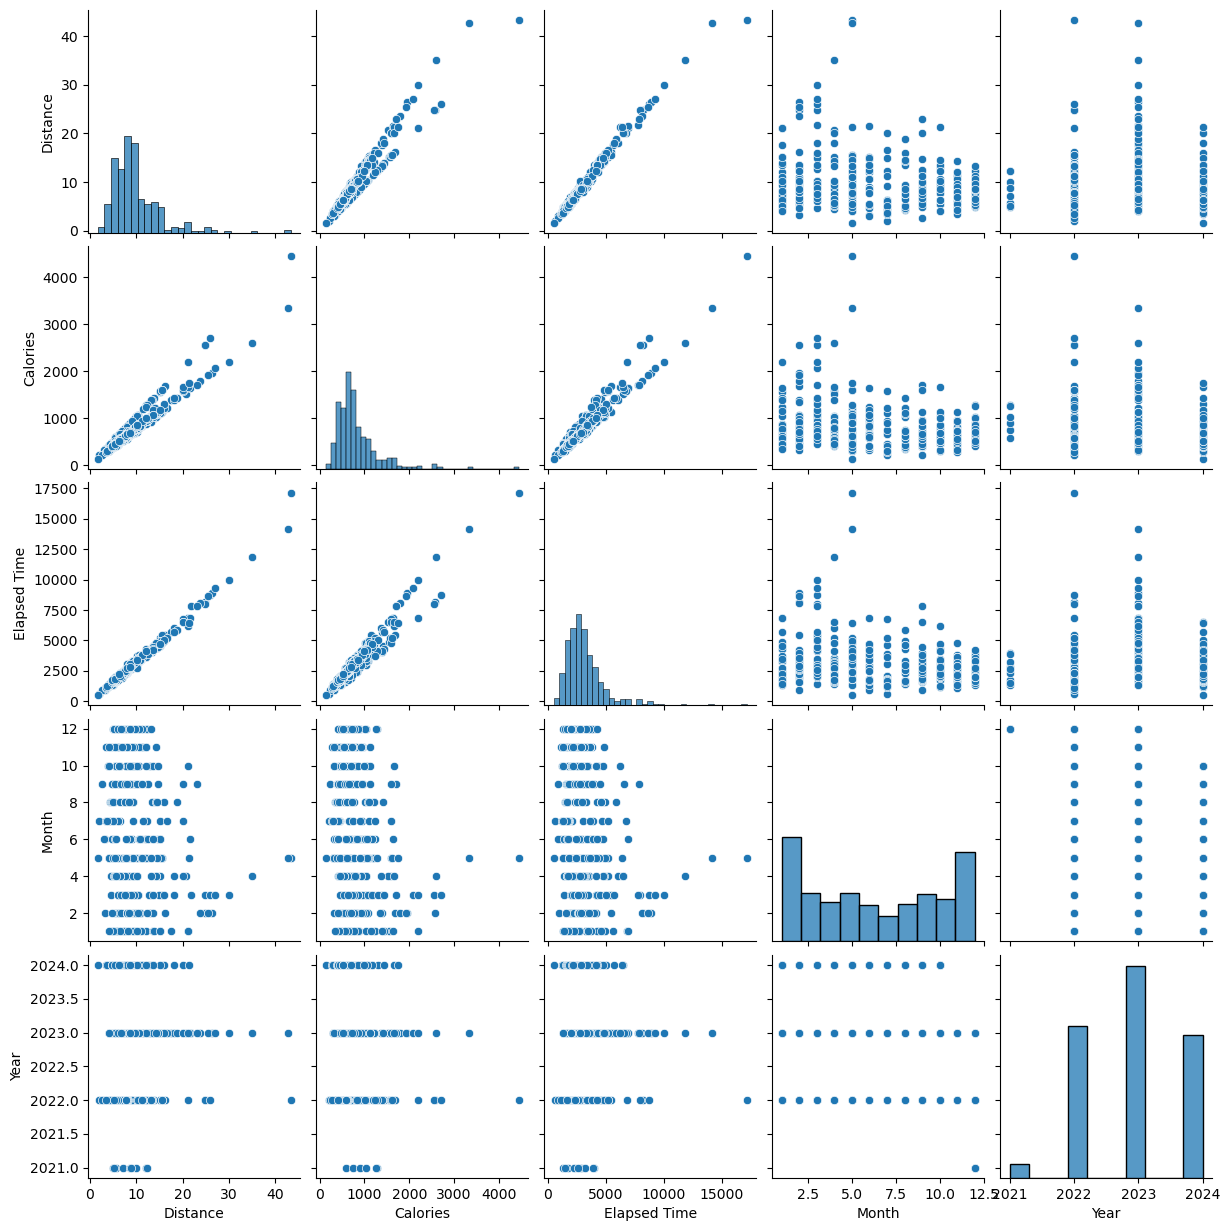

In [29]:
#idea from https://towardsdatascience.com/analysing-strava-data-with-python-b8a5badb019f
pp_df = run_df[['Distance', 'Calories','Elapsed Time','Month','Year']]
sns.pairplot(pp_df);

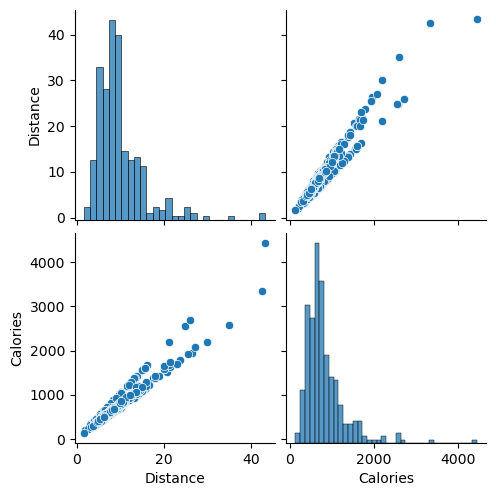

In [41]:
#plot just distance vs calories
pp_df = run_df[['Distance','Calories']]
sns.pairplot(pp_df);

#The two ~42 km distances are the two marathons I ran. You can see the difference in calories (due to difference in my weight)
#for training for the two of them

In [46]:
#look a at a summary of our data
run_df.describe().round(0)

,Elapsed Time,Distance,Max Heart Rate,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Average Heart Rate,Calories,Average Temperature,Gear,Average Elapsed Speed,Total Steps,Month,Year,Day of Year
count,343.0,343.0,340.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,340.0,340.0,281.0,195.0,343.0,233.0,343.0,343.0,343.0
mean,3220.0,10.0,176.0,3142.0,5.0,3.0,87.0,86.0,29.0,79.0,154.0,818.0,21.0,14523644.0,3.0,9642.0,6.0,2023.0,177.0
std,1863.0,5.0,8.0,1815.0,1.0,0.0,57.0,59.0,65.0,63.0,7.0,474.0,3.0,1783361.0,0.0,5070.0,4.0,1.0,109.0
min,514.0,2.0,141.0,514.0,4.0,3.0,2.0,0.0,-31.0,1.0,130.0,134.0,13.0,13017410.0,3.0,1506.0,1.0,2021.0,1.0
25%,2071.0,6.0,172.0,2026.0,4.0,3.0,50.0,47.0,4.0,44.0,149.0,545.0,19.0,13017410.0,3.0,6592.0,3.0,2022.0,76.0
50%,2827.0,9.0,177.0,2772.0,5.0,3.0,75.0,75.0,10.0,67.0,154.0,704.0,20.0,13543432.0,3.0,8446.0,6.0,2023.0,164.0
75%,3752.0,11.0,181.0,3628.0,5.0,3.0,113.0,111.0,23.0,94.0,160.0,947.0,22.0,15462145.0,3.0,11098.0,10.0,2024.0,276.0
max,17138.0,43.0,196.0,16497.0,14.0,4.0,408.0,410.0,649.0,708.0,176.0,4442.0,30.0,18129028.0,4.0,41492.0,12.0,2024.0,365.0


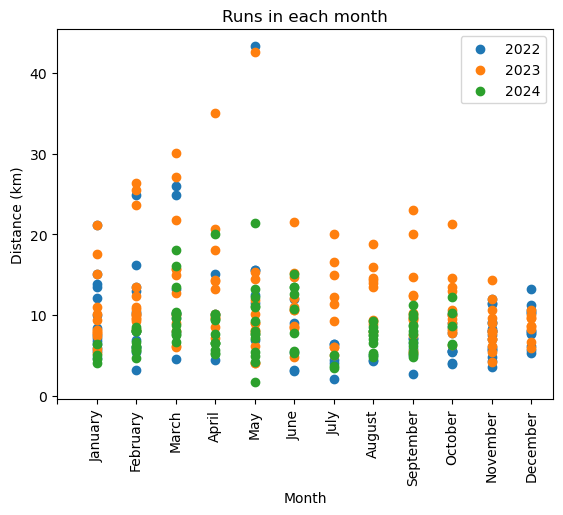

In [118]:
#plot the runs per year
for year in (2022,2023,2024):
    plt.scatter(run_df.loc[run_df['Year']==year,'Month'],run_df.loc[run_df['Year']==year,'Distance'],label=year)
   
plt.legend(loc='best')
plt.title("Runs in each month")
plt.ylabel("Distance (km)")
#axis options
month_axis = ("","January","February","March","April","May","June","July","August","September","October","November","December")
y_pos = np.arange(len(month_axis))
plt.xticks(y_pos,month_axis,rotation=90)
plt.xlabel("Month")


plt.show()

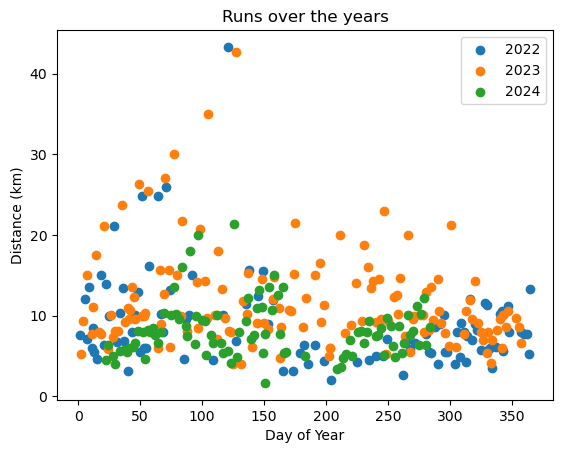

In [128]:
#plot the runs per year
#now including the day of the month
for year in (2022,2023,2024):
    plt.scatter(run_df.loc[run_df['Year']==year,'Day of Year'],run_df.loc[run_df['Year']==year,'Distance'],label=year)
plt.legend(loc='best')
plt.title("Runs over the years")
plt.ylabel("Distance (km)")
plt.xlabel("Day of Year")


plt.show()